<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/02_pytorch_rn_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 Redes Neurais de Classificacao com Pytorch

O porblema de classificacao preve se algo, eh uma coisa ou outra coisa(Pode haver varias coisas entre as opcoes). (Explicacao mais concisa que tu vai ver na vida)

## 1. Criando os dados para classificacao e preparar-los para usar

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn import datasets
import numpy as np


In [2]:
# Fazendo 1000 circulos
n_samples = 1000

#CCriando os circulos
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"5 Primeiros elementos de X:\n {X[:5]}")
print(f"5 Primeiros elementos de y:\n {y[:5]}")

5 Primeiros elementos de X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
5 Primeiros elementos de y:
 [1 1 1 1 0]


In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# Crinado um DF para os dados de circulos
circles = pd.DataFrame({"X1" : X[:, 0],
                       "X2" : X[:, 1],
                       "label": y})

circles.head(7)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1


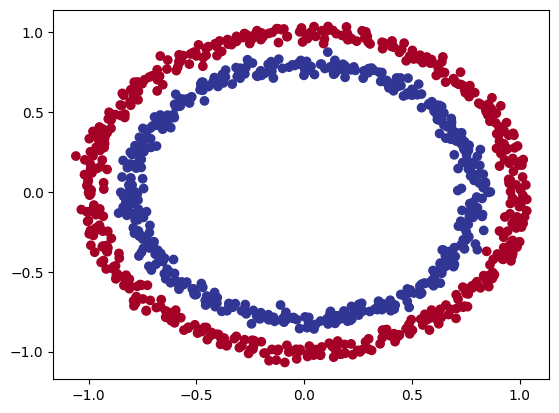

In [7]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

#Nota: Os dados que estao sendo usados, sao referidos como "Toy dataset", que remete a dataset de brinquedo, devido ao fato de ele  ser pequeno o suficiente para experimentar e ainda ser de um tamanho razoavel para praticar os fundamentos

### Checando o formato dos dados de entrada e saida

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# Vizualizando o primeiro valor das features e labels
X_sample = X[0]
y_sample = y[0]

print(f"Valor da 1 amostra de X: {X_sample} e valor da primeira amostra para y: {y_sample}")
print(f"Formato da 1 amostra de X: {X_sample.shape} e Formato da primeira amostra para y: {y_sample.shape}")

Valor da 1 amostra de X: [0.75424625 0.23148074] e valor da primeira amostra para y: 1
Formato da 1 amostra de X: (2,) e Formato da primeira amostra para y: ()


In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
#Transformando em Tensor
X = torch.from_numpy(X).type(torch.float) #.type(torch.float) pq apesar de tranformar em tensor com o ".from_numpy" eles estariam em tensor64, e queremos o default float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Ate 7:30
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test), n_samples

(800, 200, 800, 200, 1000)

## 2. Construir modelo

Modelo de classificacao para os pontos vermelhor e azuis.

Para isso:

1. Fazer um diagnostico de dispositivo para verificar se tem gpu habilitada
2.  Construir o modelo ussando a subclasse nn.Module
3. Define a loss function and a optimizer
4. Create a training and test loop

In [16]:
# 1. Diagnostico de GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [17]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Para criar o modelo,

1. Subclasse nn.Module(quase todos os modulos Pytorch estao nela, nn.Module)
2. Criar 2 camads `nn.Linear()` capazes de lidar com o formato dos nossos dados
3. Definir um metodo `forward()` que passa os dados pelo modelo (computacao para frente)
4. Isntanciar uma instancia do modelo criado e mandar para o dispositivo desejado


In [18]:
# 1. Construir um modelo que seja subclasse de nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Cirnado as duas camadas nn.linear capazes de lidar com o nosso formato de dados
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #Recebe 2 features e uperscale para 5 features, para a rede ter mais valores aonde acahr padrao
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # recebe as 5 que sairam da camada anterior e trasforma no aotput da rede

  # 3. Definindo o metodo forward() que passara os dados pra frente
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer-1 -> layer_2 -> output

# 4. Instanciando a instancia do modelo e mandando para o dspositivo "querido"
model_0 = CircleModelV0().to(device)

In [19]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cpu'

In [21]:
next(model_0.parameters()).device

device(type='cpu')

In [22]:
#Replicando o modelo_0 usando nn.Sequentia()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
#So usou de exemplo e escluiu, vou deixar p saber que da p usar a nn.Squencial dentro da classe
# e q nn.sequencial eh um jeito maissimples de fazer, quando passa de uma camada p outra
# 1. Construir um modelo que seja subclasse de nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Cirnado as duas camadas nn.linear capazes de lidar com o nosso formato de dados
    #self.layer_1 = nn.Linear(in_features=2, out_features=5) #Recebe 2 features e uperscale para 5 features, para a rede ter mais valores aonde acahr padrao
    #self.layer_2 = nn.Linear(in_features=5, out_features=1) # recebe as 5 que sairam da camada anterior e trasforma no aotput da rede
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  # 3. Definindo o metodo forward() que passara os dados pra frente
  def forward(self, x):
    #return self.layer_2(self.layer_1(x)) # x -> layer-1 -> layer_2 -> output
    return two_linear_layers
# 4. Instanciando a instancia do modelo e mandando para o dspositivo "querido"
model_0_ex = CircleModelV0().to(device)
model_0_ex

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3102, -0.4436],
                      [-0.4718,  0.4942],
                      [ 0.3891,  0.2048],
                      [-0.6964,  0.6402],
                      [-0.0144, -0.3022]])),
             ('0.bias', tensor([ 0.3832, -0.3768, -0.4656, -0.7042, -0.5647])),
             ('1.weight',
              tensor([[ 0.1706, -0.0206, -0.0438,  0.4326, -0.1324]])),
             ('1.bias', tensor([0.1219]))])

In [25]:
#Fazendo predicoes
with torch.inference_mode():
  semtreino = model_0(X_test.to(device))
print(f"Comprimento das predicoes: {len(semtreino)}, shape: {semtreino.shape}")
print(f"Comprimento da amostra de Teste: {len(X_test)}, shape: {X_test.shape}")
#print(f"\n10 Primeiras predicoes:\n{semtreino[:10]}")
print(f"\n10 Primeiras predicoes:\n{torch.round(semtreino[:10])}")

print(f"\n10 Lables:\n{y_test[:10]}")

Comprimento das predicoes: 200, shape: torch.Size([200, 1])
Comprimento da amostra de Teste: 200, shape: torch.Size([200, 2])

10 Primeiras predicoes:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.]])

10 Lables:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [26]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## Cirando o funcao de loss e otimizador

QUal funcao loss e otimizador escolher? Depende do problema

Por ex: PAra Regressao, pode ser MAE ou MSE (mean absolute error ou mean squared error)

Para classificacao pode ser: Binary cross entropy ou categorical cross entropy(cros entropy)

Binary cross entropy - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

Relembrando que a funcao de loss, mede o quao errado a predicao do modelo esta.

Para otimizadores, alem de varias outras que o pytorch tem pre-prontas, as duas mais comum sao SGD e Adam


In [27]:
# Criando a loss function
# loss_fn= nn.BCELoss = Requer que as entradas tenham passado pela função de ativação sigmoid antes de serem passadas para a BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function bult-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.1)

In [28]:
# Calculando a precissao
#Precisao eh True Positive / (True Positive + True Negative) * 100

In [29]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # Converte o tensor com esse único valor em um escalar Python
  acc = (correct/len(y_pred)) * 100
  return acc

## 3 Train model

Para treinar o modelo, precisamos criar o loop de treino com os seguintes passos:

1. Forward passs
2. Calculate de loss
3. Optimizer zero grad
4. Loss backward (Backpropagation)
5. Optimizer step(gradinet descent)


### 3.1 Going from raw logist -> prediction probabilitis -> prediction lables

(Das saidas cruas(randomicas) -> para a as probabilidades de predcoes (onde o valor de porbabilidde ira indicar a probabilidade da saida ser determinada classe) -> Para Predicoes das classes(usando o valor gerado das probabilidades para determinar a classe)

As saidas do Model_0 sera as "raw logits"

Nos podemos converter os **logits** nas **probabilidades de predicoes**  passando eles por uma funcao de ativacao(ex Sigmoid para classificacao binaria e Softmax para classificacao multiclasse).

Entao podemos converter as probalibilidade de predicao do nosso modelo nas **labels preditas**, ou aredondando eles ou passando por `argmax()`.

In [30]:
# Vendo as 5 primeiras saidas do forward pass nos dados de teste
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.2324],
        [ 0.1949],
        [ 0.0940],
        [ 0.2726],
        [-0.2817]])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Usando a funcao de ativaocao Sigmoid nos "logits" do modelo para tranfomalos em Probabilidade de Predicoes
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5578],
        [0.5486],
        [0.5235],
        [0.5677],
        [0.4300]])

Para nossos valores de Porbabilidade de Predicoes, precisamos performar uma especie de intervalo para arrendoar os numeros para classes.

EX
* y_pred_probs >= 0.5, y=1 (classe 1)
* y_pred_probs < 0.5, y=0 (classe 0)

In [33]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])

In [34]:
# Achando o Labels de predicao
y_preds = torch.round(y_pred_probs)

# Toda opercao, de novo, p comparar os resultyados
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Checando a igualdade das saidas
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Tirando a dimensao extra
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 0.])

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## Criando o loop de teste e treino

In [36]:
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Definindo o numero de "epochs"
epochs = 1000

# Colocando os dados no dispositivo que esta sendo usado
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Contruindo o loop de treino e "eval"
for epoch in range(epochs):

  #treino
  model_0.train()

  # 1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoos espera probnabilidades de predicoes com entrada
  #                y_train)
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss espera as "saidas cru do modelo sem treinamento previo" como entrada
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #Jogando na tela os acontecimentos
  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69852, Acc: 49.50% | Test loss: 0.70021, Test acc: 51.50%
Epoch: 20 | Loss: 0.69573, Acc: 49.50% | Test loss: 0.69723, Test acc: 52.50%
Epoch: 40 | Loss: 0.69455, Acc: 50.75% | Test loss: 0.69582, Test acc: 53.00%
Epoch: 60 | Loss: 0.69392, Acc: 50.62% | Test loss: 0.69503, Test acc: 52.50%
Epoch: 80 | Loss: 0.69355, Acc: 50.38% | Test loss: 0.69456, Test acc: 52.00%
Epoch: 100 | Loss: 0.69334, Acc: 51.25% | Test loss: 0.69429, Test acc: 51.00%
Epoch: 120 | Loss: 0.69322, Acc: 51.00% | Test loss: 0.69413, Test acc: 49.00%
Epoch: 140 | Loss: 0.69314, Acc: 51.00% | Test loss: 0.69405, Test acc: 49.50%
Epoch: 160 | Loss: 0.69309, Acc: 50.88% | Test loss: 0.69401, Test acc: 50.00%
Epoch: 180 | Loss: 0.69306, Acc: 50.75% | Test loss: 0.69400, Test acc: 48.50%
Epoch: 200 | Loss: 0.69304, Acc: 50.75% | Test loss: 0.69401, Test acc: 47.50%
Epoch: 220 | Loss: 0.69303, Acc: 51.00% | Test loss: 0.69403, Test acc: 48.50%
Epoch: 240 | Loss: 0.69302, Acc: 51.25% | Test loss: 0.694

## 4. Fazendo predicoes e avaliacoes do modelo

Aparentemnte as metricas mostram que noss modelo nao esta avaliando bem

Para investigar nada melhor que algumas predicoes e faze-las visualmente

"Visualize, Visualize, Visualize"

para isso, importar a funcao: `plot_decision_boundary()`

In [37]:
import requests
from pathlib import Path
# Download helper functions from Learn Pytorch(repositorio do curso) (caos nao tenha baixado ainda no ambiente)
if Path("helper_functions.py").is_file():
  print("helper_function.py ja existe no ambiente, pulando download")
else:
  print("Baixando helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
# nao funfou
#from helper_functions import plot_predictions, plot_decision_boundary

helper_function.py ja existe no ambiente, pulando download


In [38]:
from helper_functions import plot_predictions, plot_decision_boundary

In [39]:
#ja que enao funfou vou copir as duas funcoes.
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [40]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

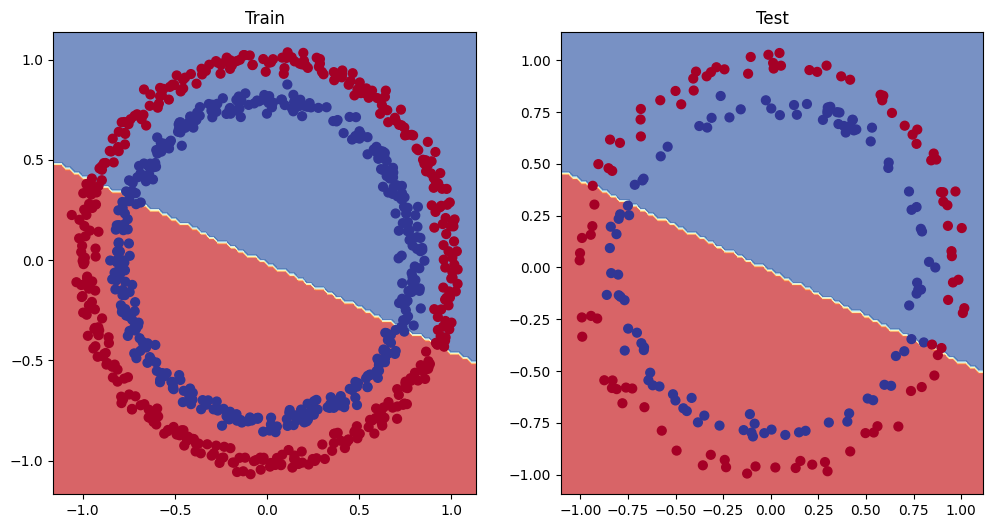

In [41]:
#Plot decision boundary do modelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## Melhorando o modelo (pela perspectiva do modelo)

* Adicionar mais camada, dar mais chance para o modelo aprender sobre os padroes nos dados
* Adicionar mais unidades escondidas (out_features -> in_features) - "Ir de 5 para 10 unidades"
* Fir por mais tempo/epocas
* Mudando a funcao de ativacao
* Mudando o "Learning Rate"
* Mudando a loss function

EU -> pela perspectiva do modelo = coisa que se pode fazer para melhorar o mecanismo do modelo, mas nesse caso nao ira acontecer nada pois o modelo est errado para nosso tipo de problema.

Prof -> pela perspectiva do modelo = As opcoes acima da da perpectiva do modelo pois lidam diretamento com o modelo e nao com os dados.

 E por causa que essas opcoes sao valores que nos podemos muda(como engenheiro de Machine Learn e/ou como Cientista de dados) eles sao chamados de **Hyperparametros**

Lista da modificaoes:
* Add unidades escondidas: 5 -> 10
* Aumentando o numero de camadas: 2 -> 3
* Aumentando o numero de epocas 100 -> 1000

In [42]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x))) # Escrever operações dessa maneira aproveita acelerações onde possível nos bastidores

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
# Crinado uma funcao loss
loss_fn = nn.BCEWithLogitsLoss()
# Criando um otimizador
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [48]:
# Loop de Treino e Teste
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Aumentando o treino 100 -> 1000
epochs = 1000

#DIrecionando os dados para o dispositiv usado
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #TReino
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logist -> pred Probabilities -> Predicion labes

  # 2. Calculo da Loos/Acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradinet descent)
  optimizer.step()

  ### TESTE
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculo do loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Na tela Dj
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 100 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 200 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 300 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 400 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 500 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 600 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 700 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 800 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%
Epoch: 900 | loss: 0.69298, Acc: 51.00% | Test loss: 0.6946795582771301, Test Acc: 46.00%


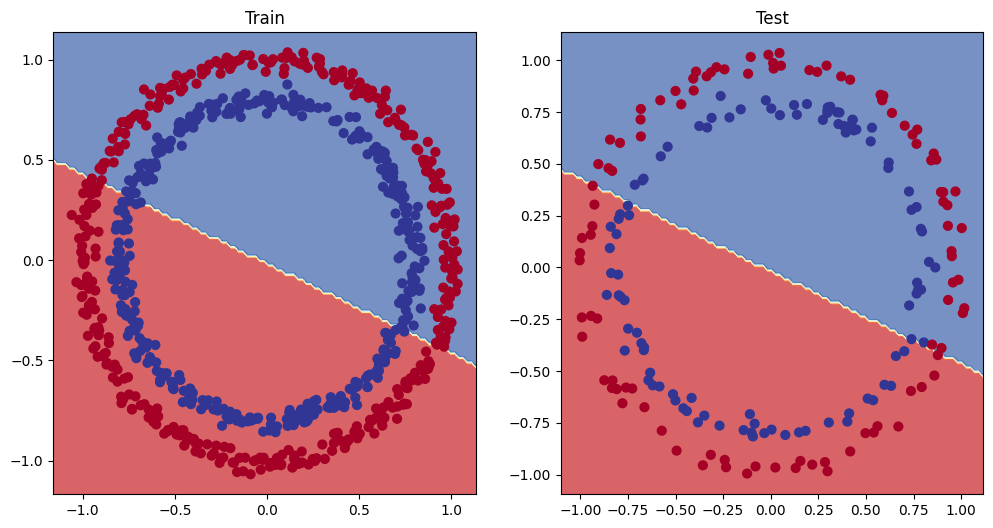

In [49]:
#Plot decision boundary do modelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparando dados para ver se o modelo aprende com linha reta

Uma maneira de resolver um problema grande eh testando um prblema menor e mais gerenciável que pode ajudar a isolar e identificar problemas de forma mais eficiente

In [50]:
# Recriando os dados de linha reta do modulol1
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Criando os dados
X_reg = torch.arange(start, end, step).unsqueeze(dim=1)
y_reg = weight * X_reg + bias


print(len(X_reg))
X_reg[:5], y_reg[:5]



100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [53]:
train_split = int(0.8 * len(X_reg))
X_train_reg, y_train_reg = X_reg[:train_split], y_reg[:train_split]
X_test_reg, y_test_reg = X_reg[train_split:], y_reg[train_split:]

# Tamanho
len(X_train_reg), len(y_test_reg)

(80, 20)

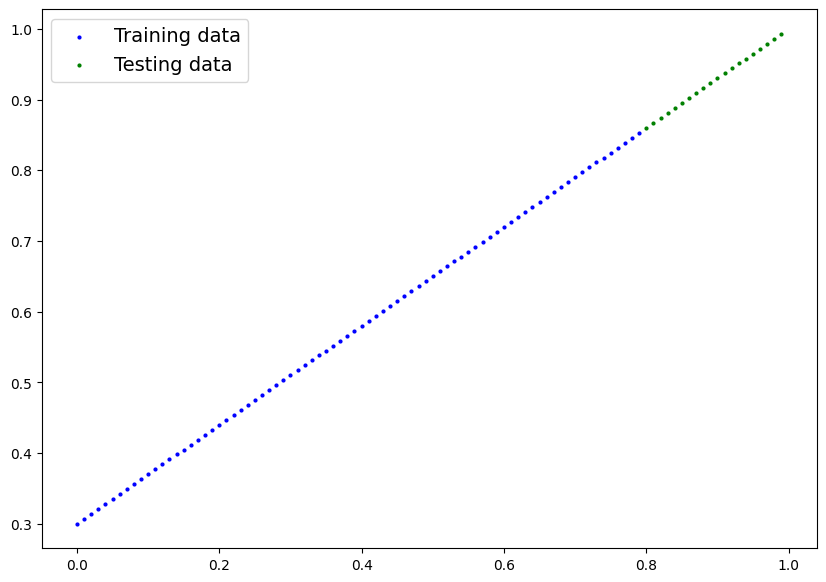

In [54]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg)

In [55]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)